# Least saquare fitting gappy data

In [2]:
import numpy as np
from numpy import pi, cos, sin
from scipy.linalg import inv
import matplotlib.pyplot as plt

## We will work with some fake data

Here we will mimic 2 years of monthly measurements that are composed by a mean, annual cycle and noise:

$$y = 0.6 + 0.2\cos({2\pi/T}) + \sin({2\pi/T}) + noise$$

In [3]:
L = 2*24 # length of the fake timeseries in months
t = np.arange(1, L) # fake time in months
T = 12 # period of the annual cycle in months
error = 0.2*np.random.randn(len(t))
y = 0.6 +0.2*cos(2*pi*t/T) +  sin(2*pi*t/T) +  error # mean + annualcycle + noise

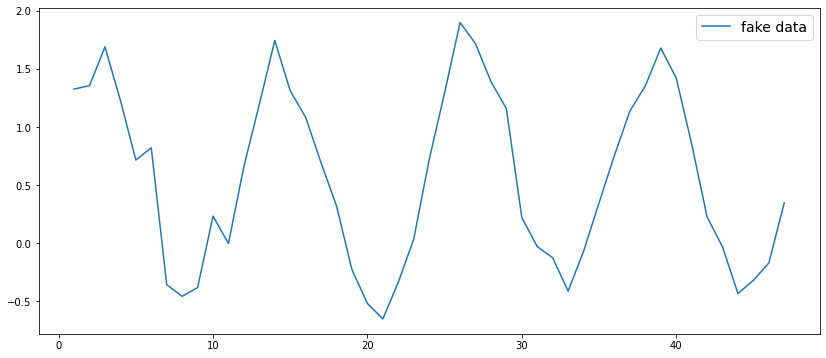

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(t, y, label='fake data')
plt.legend(fontsize=14)

Now, let's do a 3-aprameter fit for the mean, and amplitude of cosine and sine of the annual cycle

In [5]:
A = np.array([ np.ones(len(t)), cos(2*pi*t/T), sin(2*pi*t/T)]).T 
fit = np.dot(inv(np.dot(A.T, A)), np.dot(A.T, y))
print(fit)

[0.5653507  0.21027549 0.99396448]


Now let's plot the fake data and the fit

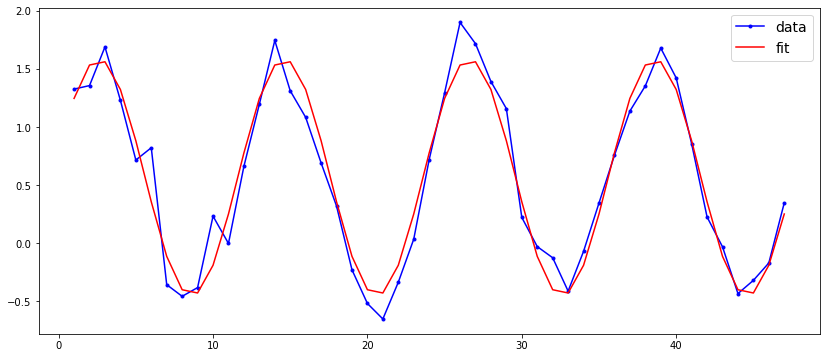

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(t, y, '.-b', label= 'data')
plt.plot(t, fit[0] + fit[1]*cos(2*pi*t/T) + fit[2]*sin(2*pi*t/T), 'r', label= 'fit')
plt.legend(loc=1, fontsize=14)

#### Finaly, we could compute the misfit

In [7]:
model = fit[0] + fit[1]*cos(2*pi*t/T) + fit[2]*sin(2*pi*t/T)
misfit = np.sum(y - model)
print(misfit)

-1.4155343563970746e-15


#### And our squared quantity

In [8]:
sig = (np.mean(error**2))**.5
chi2 = np.sum(((y - model)/sig)**2)
print(chi2)

45.1318145045675


In [9]:
import scipy.special as spe
nu = len(t) - 3
print('lower', spe.gammainccinv(nu/2, 0.05)*2)
print('upper', spe.gammainccinv(nu/2, 0.5)*2)

lower 60.48088658233643
upper 43.33515897966389


## Now let's add some gapps in the data

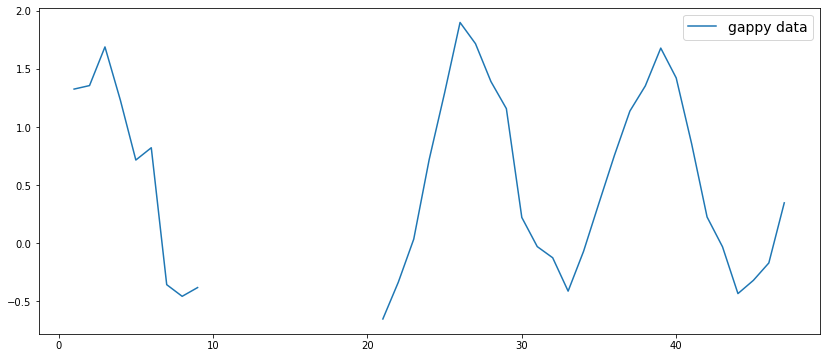

In [10]:
y_gappy = np.ma.masked_where((t>=10) & (t<=20), y)
plt.figure(figsize=(14, 6))
plt.plot(t, y_gappy, label='gappy data')
plt.legend(loc=1, fontsize=14)

In [11]:
y_gappy # y_gappy is a masked array. The mask for invalid measurements is True

masked_array(data=[1.3243935892423693, 1.3545908249168201,
                   1.686949177527077, 1.2281467232481786,
                   0.7144085646253109, 0.8201685850798535,
                   -0.3570790195484552, -0.4572101678022558,
                   -0.38199324527014655, --, --, --, --, --, --, --, --,
                   --, --, --, -0.6520044265013687, -0.3362244447439978,
                   0.03416503503294133, 0.7183610145216025,
                   1.2924190598070862, 1.897170962479772,
                   1.7146631197177364, 1.3893325118153008,
                   1.156413198891646, 0.22086318566639285,
                   -0.029744442281371325, -0.12564143725080573,
                   -0.41255812839108974, -0.07037246170772206,
                   0.34533643752575555, 0.7549710876933605,
                   1.135201969915789, 1.3518796147717576,
                   1.676798582321325, 1.4204623390480013,
                   0.8542157278674932, 0.22480418259986326,
                  

Now, we will ignore the missing values and extract the values of y_gappy and t only where we have good data.

In [12]:
y_valid = y_gappy[y_gappy.mask==False]
t_valid = t[y_gappy.mask==False]
print(y_valid.shape,t_valid.shape)

(36,) (36,)


In [13]:
A = np.array([ np.ones(len(t_valid)), cos(2*pi*t_valid/T), sin(2*pi*t_valid/T)]).T 
fit_gappy = np.dot(inv(np.dot(A.T, A)), np.dot(A.T, y_gappy.compressed())) #  y_gappy.data gets only the valid values of y_gappy
print(fit_gappy)

[0.58584616 0.18683968 1.01997176]


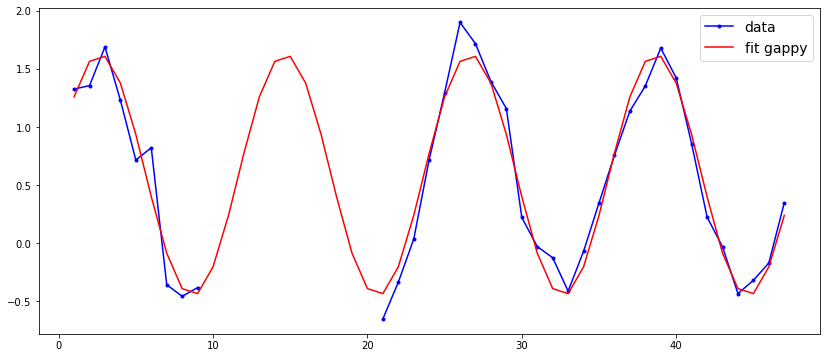

In [14]:
plt.figure(figsize=(14, 6))
plt.plot(t, y_gappy, '.-b', lw=1.5, label= 'data')
plt.plot(t, fit_gappy[0] + fit_gappy[1]*cos(2*pi*t/T) + fit_gappy[2]*sin(2*pi*t/T), 'r', label= 'fit gappy')
plt.legend(loc=1, fontsize=14)

It's still good enough, but there is a limit for that. If you have a lot of gaps, then you might not have information to resolve the annual cycle.

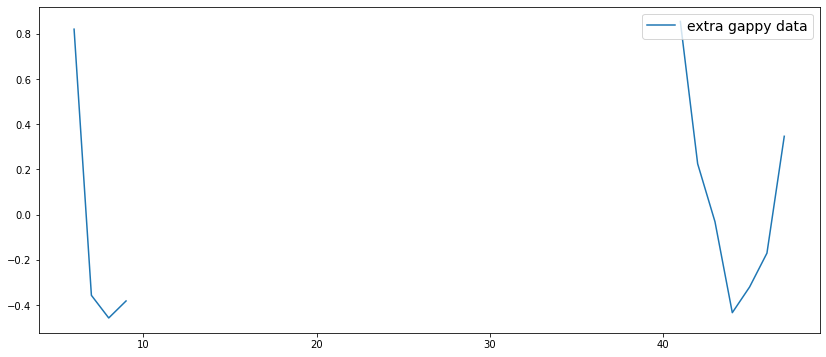

In [15]:
y_gappy = np.ma.masked_where( (t<=5)| ((t>=10) & (t<=40)), y)
plt.figure(figsize=(14, 6))
plt.plot(t, y_gappy, label='extra gappy data')
plt.legend(loc=1, fontsize=14)

In [16]:
y_valid = y_gappy[y_gappy.mask==False]
t_valid = t[y_gappy.mask==False]
A = np.array([ np.ones(len(t_valid)), cos(2*pi*t_valid/T), sin(2*pi*t_valid/T)]).T 
fit_ext_gappy = np.dot(inv(np.dot(A.T, A)), np.dot(A.T, y_gappy.compressed())) #  y_gappy.data gets only the valid values of y_gappy
print(fit_ext_gappy)

[0.6557693  0.26491481 1.0715575 ]
